# Risk Comparsion

1. Get rankings of risk prediction scores from PCE and DDH
2. Look at their relative positions 
3. See how many of them are reclassified. 

## Project PCE thresholds DDH Risks

In [69]:
import pandas as pd

In [70]:
ddh_risk_df = pd.read_csv('/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/GitHub/Dynamic-DeepHit LRPP/DDH_pred_df.csv')

In [71]:
ddh_risk_df['risk_category'] = 'low'
ddh_risk_df.loc[(ddh_risk_df['value'] >= 0.05) & (ddh_risk_df['value'] < 0.075), 'risk_category'] = 'borderline'
ddh_risk_df.loc[(ddh_risk_df['value'] >= 0.075) & (ddh_risk_df['value'] < 0.2), 'risk_category'] = 'intermediate'
ddh_risk_df.loc[(ddh_risk_df['value'] >= 0.20), 'risk_category'] = 'high'

In [72]:
ddh_risk_df.risk_category.value_counts()/len(ddh_risk_df)

intermediate    0.60480
borderline      0.26432
low             0.13088
Name: risk_category, dtype: float64

<AxesSubplot:>

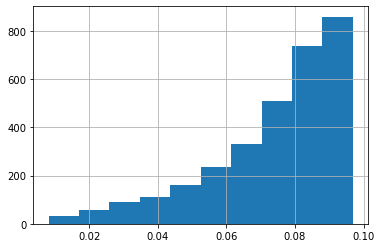

In [73]:
ddh_risk_df.value.hist()

In [74]:
len(ddh_risk_df)

3125

## Ranking Comparison

In [75]:
pce_pred_df = pd.read_csv('/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/GitHub/Dynamic-DeepHit LRPP/AUC + Risk Calculations/pce_pred_df.csv')

In [76]:
pce_pred_df

ln_age  ln_age_sq  ln_tot_chol  ln_ageXln_tot_chol     ln_HDL  \
0    -118.310729  76.987556    72.007345          -65.750518 -60.638100   
1    -120.997141  80.523472    70.829211          -66.143286 -54.656225   
2    -120.997141  80.523472    71.739217          -66.993088 -49.743840   
3    -118.867736  77.714177    71.256825          -65.371539 -60.322319   
4       9.848802   0.000000     1.617689            0.000000  -1.091492   
...          ...        ...          ...                 ...        ...   
3105   44.902364   0.000000    63.876667          -52.222959 -32.442940   
3106 -112.080002  69.092123    76.629389          -66.285990 -52.563167   
3107 -109.170473  65.551504    67.384975          -56.776226 -51.985293   
3108 -112.080002  69.092123    71.256825          -61.638612 -52.563167   
3109   51.902726   0.000000    65.819230          -62.200373 -31.257064   

      ln_ageXln_HDL    ln_SBP  ln_ageXSBP  ln_unSBP  ln_ageXunSBP  smoker  \
0         55.834790  0.000000         0.0  9.449010           0.0   0.000   
1         51.469495  0.000000         0.0  8.972781           0.0   7.574   
2         46.843527  0.000000         0.0  9.126350           0.0   0.000   
3         55.805523  0.000000         0.0  9.126350           0.0   0.000   
4          0.000000  9.040644         0.0  0.000000           0.0   0.000   
...             ...       ...         ...       ...           ...     ...   
3105      26.128504  0.000000         0.0  8.474293           0.0   0.000   
3106      45.850579  0.000000         0.0  9.642635           0.0   7.574   
3107      44.169334  0.000000         0.0  9.336230           0.0   7.574   
3108      45.850579  0.000000         0.0  9.268740           0.0   7.574   
3109      29.098023  8.632826         0.0  0.000000           0.0   0.000   

      ln_ageXsmoker     dm        sum category   mean    surv   risk  \
0         -0.000000  0.000 -30.420647       WF -29.18  0.9665  0.010   
1         -6.760638  0.000 -29.188330       WF -29.18  0.9665  0.033   
2         -0.000000  0.000 -29.501503       WF -29.18  0.9665  0.024   
3         -0.000000  0.000 -30.658718       WF -29.18  0.9665  0.008   
4          0.000000  0.645  20.060643       BM  19.54  0.8954  0.170   
...             ...    ...        ...      ...    ...     ...    ...   
3105      -0.000000  0.000  58.715929       WM  61.18  0.9144  0.008   
3106      -6.262398  0.000 -28.402831       WF -29.18  0.9665  0.071   
3107      -6.099830  0.000 -30.015779       WF -29.18  0.9665  0.015   
3108      -6.262398  0.000 -29.501913       WF -29.18  0.9665  0.024   
3109      -0.000000  0.000  61.995368       WM  61.18  0.9144  0.183   

      true_label           risk_cat  
0              0           Low Risk  
1              0           Low Risk  
2              0           Low Risk  
3              0           Low Risk  
4              1  Intermediate Risk  
...          ...                ...  
3105           0           Low Risk  
3106           0    Borderline Risk  
3107           0           Low Risk  
3108           0           Low Risk  
3109           1  Intermediate Risk  

[3110 rows x 20 columns]

In [77]:
pce_pred_df_order = pce_pred_df.loc[:,['risk', 'risk_cat', 'true_label']].sort_values('risk').reset_index().rename(columns = {'index': 'id'}).reset_index().rename(columns = {'index': 'risk_order_pce'})

In [80]:
ddh_risk_df = ddh_risk_df.loc[ddh_risk_df.pt_id.isin(pce_pred_df_order['id']),]
ddh_risk_df_order = ddh_risk_df.loc[:,['value', 'risk_category']].sort_values('value').reset_index().rename(columns = {'index': 'id'}).reset_index().rename(columns = {'index': 'risk_order_ddh'})

In [82]:
pce_pred_df_order = pce_pred_df_order.rename(columns = {'risk_cat' : 'risk_cat_pce'})
ddh_risk_df_order = ddh_risk_df_order.rename(columns = {'risk_category' : 'risk_cat_ddh'})

In [83]:
risk_df_order = pd.merge(pce_pred_df_order, ddh_risk_df_order)

In [84]:
risk_df_order.to_csv('risk_df_order.csv', index = False)

## Race & Sex Category Comparison
Race Category:
1. White 
2. Black 

Sex Category:
1. Male
2. Female

In [122]:
df = pd.read_csv('/Volumes/fsmresfiles/PrevMed/Projects/MESA_RiskPred/LRPP data/LRPP_select.csv')
indecies_test = pd.read_csv('/Volumes/fsmresfiles/PrevMed/Projects/MESA_RiskPred/LRPP data/random_index_select.csv')
indecies_test.columns = ['index', 'label', 'study_index']
indecies_test = indecies_test.loc[indecies_test['study_index'] == True, :]
df = df.loc[df['id'].isin(indecies_test['index']), :]
# filter out patients without data before 8 years
max_age_before_threshold = df.loc[df['times'] <= 8, :].groupby('id').times.max().reset_index()
df = df.loc[df['id'].isin(max_age_before_threshold['id']), :]

# gender 
df = df[['id', 'race', 'gender']].drop_duplicates().reset_index().reset_index().drop(columns=('index'))
df['id'] = df['level_0']

# merge datasets 
risk_demo = pd.merge(risk_df_order, df[['id', 'race', 'gender']]) 

In [125]:
from sklearn.metrics import roc_auc_score

### Race

In [123]:
risk_demo.head()

risk_order_pce    id   risk risk_cat_pce  true_label  risk_order_ddh  \
0               0  2129  0.001     Low Risk           0            1068   
1               1  2406  0.001     Low Risk           0            2702   
2               2  1787  0.001     Low Risk           0            1553   
3               3  3019  0.001     Low Risk           0             633   
4               4  2160  0.001     Low Risk           0            2953   

      value  risk_cat_ddh  race  gender  
0  0.071664    borderline     2       2  
1  0.092760  intermediate     1       2  
2  0.079711  intermediate     2       2  
3  0.059590    borderline     1       2  
4  0.096302  intermediate     2       2

In [132]:
risk_demo_white = risk_demo.loc[risk_demo['race'] == 1, :]
print('PCE AUC White:', roc_auc_score(risk_demo_white['true_label'], risk_demo_white['risk']))
print('DDH AUC White:', roc_auc_score(risk_demo_white['true_label'], risk_demo_white['value'])

SyntaxError: unexpected EOF while parsing (1716037821.py, line 3)

---------------------
# Graveyard






## Risk Comparison
1. Scale risk scores to mean 

In [ ]:
len(pce_pred_df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

risk_df = pd.concat([ddh_risk_df['value'], pce_pred_df['risk']], axis = 1)
risk_df.columns = ['ddh_risk', 'pce_risk']

scaler = MinMaxScaler()
risk_df_scale = scaler.fit_transform(risk_df.to_numpy())
risk_df_scale = pd.DataFrame(risk_df_scale)

risk_df_scale = risk_df_scale.reset_index().rename(columns = {'index':'id'})
risk_df_scale.columns = ['index','ddh_risk_scaled', 'pce_risk_scaled']

In [ ]:
risk_df_scale.mean()

In [ ]:
# calculate distance
risk_df_scale['ddh_risk_scaled_dist'] = (risk_df_scale['ddh_risk_scaled'] - risk_df_scale['ddh_risk_scaled'].mean())
risk_df_scale['pce_risk_scaled_dist'] = (risk_df_scale['pce_risk_scaled'] - risk_df_scale['pce_risk_scaled'].mean()) 

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(5, 5)})

In [ ]:
sns.scatterplot(data=risk_df_scale, x="pce_risk_scaled_dist", y="ddh_risk_scaled_dist")

In [ ]:
risk_df_scale.pce_risk_scaled. hist()

In [ ]:
risk_df_scale.ddh_risk_scaled.hist()